# Chapter 3 분류 모델의 성능 개선 방법

## 3.1.1 학습 데이터 변경


1. 교차검증: 기존의 독립변수가 가지는 의미를 내포한 새로운 변수
2. 스케일링: 범위를 모두 0~1사이에 분포하도록 변환
3. 차원축소: 학습용 데이터와 검증용 데이터의 역할을 번갈아 가면서 학습을 진행
    - 학습용, 검증용은 섞이지 않아야함.


## 3.1.2 학습 방법 변경
1. 다른 모델
2. 하이퍼파라미터 튜닝
3. 이른 종료: 학습 데이터에는 성능 좋아지지만, 검증 데이터에 대해 성능 개선이 없을 경우, 과적합 징조라 판단 후 학습 중단

## 3.2.1 교차검증
**훈련용, 검증용 역할을 교차로 하는 방법**
- 1단계: 최적의 학습 모델 조건 찾기  
    하이퍼파라미터 후보 → 교차검증 → 최적 하이퍼파라미터 추출
- 2단계: 최적의 학습 조건으로 학습하기  
    학습 데이터 → 모델 생성 → 모델 평가   
    테스트 데이터 → 모델 평가

### 1. K-fold 방식
- 데이터 k개로 분할하여 1/k에 해당되는 데이터셋을 학습용, 나머지 검증용으로 사용  

In [113]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')

In [114]:
iris = load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [115]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [116]:
iris_df=pd.DataFrame(data = iris.data, columns= iris.feature_names)
iris_df['label'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [117]:
iris_df.drop_duplicates(keep = 'first', inplace=True)
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  149 non-null    float64
 1   sepal width (cm)   149 non-null    float64
 2   petal length (cm)  149 non-null    float64
 3   petal width (cm)   149 non-null    float64
 4   label              149 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 6.4 KB


In [118]:
X = iris_df.iloc[:,:4]
y = iris_df['label']

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42,stratify = y)

In [120]:
kf = KFold(n_splits = 3) # 기본값 = 5
for train_index, test_index in kf.split(X):
    print('---------------------------')
    print('학습용:', train_index)
    print('\n학습용 레이블', y.iloc[train_index].unique())
    print('\n테스트용:', test_index)
    print('\n테스트용 레이블', y.iloc[test_index].unique())

---------------------------
학습용: [ 50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85
  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 147 148]

학습용 레이블 [1 2]

테스트용: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]

테스트용 레이블 [0]
---------------------------
학습용: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 

- 중복없이 역할 변경되었지만 첫번째 분할에서 학습용이 1,2 테스트 용이 0 할당
- 첫 번째에서는 0 학습이 되지 않고 검증하는 상황 발생
- 결론: 좋은 성능 기대할 수 없음

### 2. Stratified K-fold 방식
- 카테고리를 나타내는 레이블 데이터를 균일한 분포로 학습용, 검증용으로 분할
- 특정 레이블의 데이터만 많이 존재하는 왜곡된 레이블 데이터세트는 반드시 Stratified K-fold 이용

In [121]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
for train_index,test_index in skf.split(X,y):
    print('---------------------------')
    print('학습용:', train_index)
    print('\n학습용 레이블', y.iloc[train_index].unique())
    print('\n테스트용:', test_index)
    print('\n테스트용 레이블', y.iloc[test_index].unique())

---------------------------
학습용: [ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  67  68  69
  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87
  88  89  90  91  92  93  94  95  96  97  98  99 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 147 148]

학습용 레이블 [0 1 2]

테스트용: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

테스트용 레이블 [0 1 2]
---------------------------
학습용: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  83  84  85  86
  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 1

- split()에 x,y 모두 넘겨야함
- 3번의 분할 모두 [0,1,2] 포함되어 분할

**3. cross_validate()**
- 데이터 분할과 교차검증 함께 가능

## 3.2.2 스케일 조절
**데이터 값의 범위를 변환시키는 방법**
### 1. MinMaxScaler

In [122]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [123]:
# minmaxscaler
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()
minmax_scaler.fit(X)  # 데이터 최소값, 최대값 기준점 정하는 과정
minmax_scaled_data = minmax_scaler.transform(X) # 기준을 사용하여 변환하는 과정
minmax_scaled_df = pd.DataFrame(data = minmax_scaled_data, columns = iris.feature_names)
minmax_scaled_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,149.000000,149.000000,149.000000,149.000000
mean,0.428784,0.441555,0.465931,0.456096
std,0.230792,0.181809,0.299626,0.317759
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.559322,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


- 최소: 0
- 최대: 1

### 2. StandardScaler

In [126]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
standard_scaler.fit(X)
standard_scaled_data = standard_scaler.transform(X)
standard_scaled_df = pd.DataFrame(data = standard_scaled_data, columns= iris.feature_names)
standard_scaled_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,1.490000e+02,1.490000e+02,1.490000e+02,1.490000e+02
mean,-2.193622e-15,-1.907497e-15,-1.525998e-15,-9.537486e-16
std,1.003373e+00,1.003373e+00,1.003373e+00,1.003373e+00
min,-1.864149e+00,-2.436862e+00,-1.560289e+00,-1.440192e+00
25%,-8.980334e-01,-5.972549e-01,-1.219738e+00,-1.177055e+00
50%,-5.268246e-02,-1.373532e-01,3.127435e-01,1.386329e-01
75%,6.719041e-01,5.524994e-01,7.668121e-01,7.964768e-01
max,2.483370e+00,3.081959e+00,1.788466e+00,1.717458e+00


- 평균값 0에 근사
- 표준편차 1에 근사

## 3.2.3 차원축소
**매우 많은 피처로 구성된 다차원 데이터를 함축적으로 더 잘 설명할 수 있는 또 다른 공간으로 매핑해서 추출하는 방법 (PCA)**

- 차원이 높은 경우
    - 상관관계 높을 가능성이 크고 데이터 밀도가 희박
    - 독립변수X는 많은데 타겟 데이터(종속변수y)를 설명하는데 불필요한 내용 존재, 중복 데이터 존재할 수 있음
    - 차원의 저주: 차원이 증가하면 성능이 떨어지는 현상
    - 예시) 이미지: 이미지 차원 축소 방법은 PCA, LDA

***PCA에서 차원 변환 절차**
1. 공분산(Covariance)계산
2. 고유벡터(Eigen Value) 계산
3. 고유값(Eigen Value) 선택 
4. 변환행렬(Transform Matrix)생성
5. 선형변환

In [128]:
# 라이브러리 로딩
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

In [131]:
# 데이터 불러오기
iris = load_iris()
df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
df['species'] = iris.target

In [136]:
# PCA
pca = PCA(n_components=4)
pca.fit(X)
print(pca.explained_variance_ratio_)
# explained_variance_ratio_
#: 각 컴포넌트의 수가 얼마만큼 원본 데이터의 정보를 설명할 수 없는지 나타내는 값

[0.92497081 0.05276705 0.0170316  0.00523054]


- 1차원: 약 92%
- 2차원: 약 5%
- 3차원: 약 1.7%
- 4차원: 약 0%  
: 2개의 차원만 사용해도 약 95%의 설명력을 가진 새로운 피처 만들 수 있음

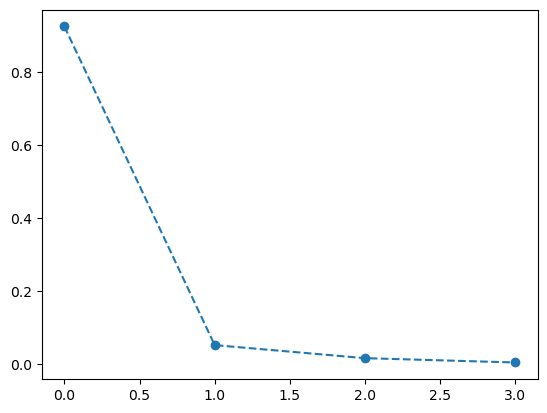

In [138]:
# scree plot
plt.plot(pca.explained_variance_ratio_,'o--')

- 가로축: 주성분 수 (각 주성분 수 - 1)
- 세로축: 고유값(Eigen Value)
- 1.0: 기울기가 급격하게 꺾이는 지점 (Elbow point)  
: 주성분 수 2


In [139]:
# 2개의 주성분수를 가지는 PCA
pca = PCA(n_components = 2)
pca_transformed = pca.fit_transform(iris.data)

In [140]:
df['pca_1'] =  pca_transformed[:,0]
df['pca_2'] =  pca_transformed[:,1]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,pca_1,pca_2
0,5.1,3.5,1.4,0.2,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,-2.728717,0.326755


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int32  
 5   pca_1              150 non-null    float64
 6   pca_2              150 non-null    float64
dtypes: float64(6), int32(1)
memory usage: 7.7 KB


<Axes: xlabel='pca_1', ylabel='pca_2'>

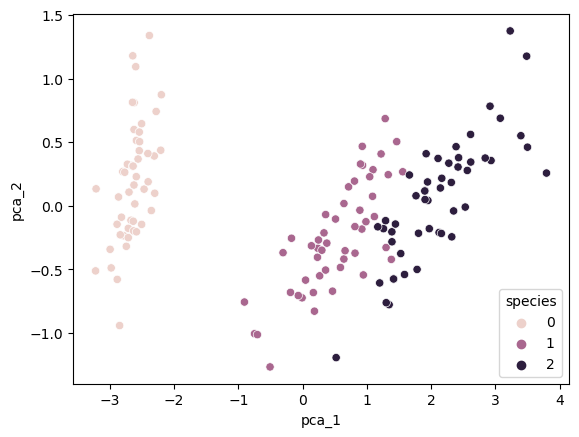

In [144]:
# 시각화 
import seaborn as sns

sns.scatterplot(x = df['pca_1'],y= df['pca_2'], hue = df['species'], legend = 'auto')